#IST664/CIS668 - Homework 3 (assigned in Week 7)#

Note to students: You may freely use code from the labs for this class without the need for attributions. 

Originality assertion: All of the text and comments in this file are my original work (except for template items written by the instructor). All of the code in this file is my work, except where I give credit to another source. By adding my name below, I affirm this originality assertion.

*** My name: Shubham Sharma ***

Sometimes, it can be beneficial to discuss the challenges in the homework with another student. This is fine as long as you do not share code with the other person. If you consulted with anyone about this homework, list their names here:

*** My collaborators: _________ ***


**Task 1: Read Sentence Pairs from Github**

It is a weird acronym, but the "Sentences Involving Compositional Knowledge" (SICK) dataset includes a large number of sentence pairs with various levels of similarity. I've stored a copy in my GitHub account and you should be able to download it directly to your virtual machine and into a Pandas dataframe. Here's a link to a web page with more information about the data:
https://marcobaroni.org/composes/sick.html 

In [1]:
import pandas as pd

sick_data = pd.read_csv("https://raw.githubusercontent.com/jmstanto/ist664/main/SICK_train.txt" , sep='\t', on_bad_lines='skip', index_col=None) 

#
# Add code to display the first few rows of data

sick_data.head()



,pair_ID,sentence_A,sentence_B,relatedness_score,entailment_judgment
0,1,A group of kids is playing in a yard and an ol...,A group of boys in a yard is playing and a man...,4.5,NEUTRAL
1,2,A group of children is playing in the house an...,A group of kids is playing in a yard and an ol...,3.2,NEUTRAL
2,3,The young boys are playing outdoors and the ma...,The kids are playing outdoors near a man with ...,4.7,ENTAILMENT
3,5,The kids are playing outdoors near a man with ...,A group of kids is playing in a yard and an ol...,3.4,NEUTRAL
4,9,The young boys are playing outdoors and the ma...,A group of kids is playing in a yard and an ol...,3.7,NEUTRAL


In [2]:
# Add code that shows the number of rows in the dataset.
# Add comments describing what each of the columns contains. 

print(f" The number of rows in dataset are: {sick_data.shape[0]}")

# Relatedness score shows how closely the sentences are related with 5 being highly related and 1 being not related in a semantic and syntactic way.

# Entailment_judgement contains three categories of values -  'NEUTRAL', 'ENTAILMENT', 'CONTRADICTION'

# Sentence A is a normal sentence. 

# Sentence B is a sentence with very high lexical overlap with sentence A but different meaning, or a completely unrelated sentence.

 The number of rows in dataset are: 4500


**Task 2: Add a Similarity Score to Each Row**

Use a pre-trained sentence embedding model to generate a similarity score for each sentence pair. To get started, here's some code from Lab 7:

In [3]:
# The first thing we will need is the library for loading sentence transformers
# This generates a lot of output, but should run pretty fast.
!pip install -q sentence-transformers

In [4]:
# Now load a pre-trained sentence transformer. There are hundreds to choose from.
# This downloads a lot of data to your virtual machine and takes half a minute or so.
from sentence_transformers import SentenceTransformer

# Here's a sentence transformer model that encodes a d=384 vector. See:
# https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [5]:
# Here we put the sentence transformer to use to encode the two sentences
# from the first row and compute a cosine similarity between them.
from sentence_transformers.util import cos_sim

print(sick_data["sentence_A"][0])
print(sick_data["sentence_B"][0])
a = model.encode([sick_data["sentence_A"][0]])
b = model.encode([sick_data["sentence_B"][0]])

cos_sim(a, b).tolist()[0][0] # The notation on the end extracts a scalar from the tensor object

A group of kids is playing in a yard and an old man is standing in the background
A group of boys in a yard is playing and a man is standing in the background


0.8510397672653198

In [6]:
# Add code to produce a list of similarity score sentence pairs and insert the
# list to the Pandas dataframe as a new column. You can use the "insert" method
# on a df to add a column.
#
# Note that if you process the whole dataset, it will take a couple of minutes
# to encode all of the sentences. Feel free to subset the data down to 500
# or 1000 rows if you want to shorten the run time.


# Encoding the sentences using Sentence Transformer model and getting a cosine similarity score. Score closer to 1 indicates sentences are more similar.

similarity = []

for i in range(sick_data.shape[0]):
  a = model.encode([sick_data["sentence_A"][i]])
  b = model.encode([sick_data["sentence_B"][i]])

  similarity.append(cos_sim(a, b).tolist()[0][0]) # The notation on the end extracts a scalar from the tensor object

In [7]:
sick_data["similarity"] = similarity

In [8]:
# Review a few rows of the Pandas df with the new column
sick_data.head()

,pair_ID,sentence_A,sentence_B,relatedness_score,entailment_judgment,similarity
0,1,A group of kids is playing in a yard and an ol...,A group of boys in a yard is playing and a man...,4.5,NEUTRAL,0.851040
1,2,A group of children is playing in the house an...,A group of kids is playing in a yard and an ol...,3.2,NEUTRAL,0.540574
2,3,The young boys are playing outdoors and the ma...,The kids are playing outdoors near a man with ...,4.7,ENTAILMENT,0.800535
3,5,The kids are playing outdoors near a man with ...,A group of kids is playing in a yard and an ol...,3.4,NEUTRAL,0.608034
4,9,The young boys are playing outdoors and the ma...,A group of kids is playing in a yard and an ol...,3.7,NEUTRAL,0.489728


In [9]:
# Run and interpret a simple correlation between your new similarity score
# and the original relatedness_score column. The corr() method can do this. 

sick_data.corr()["similarity"]["relatedness_score"]


0.8415403677138612

**Task 3: Create Dummy Codes for Entailment**

In this task after this one, you will produce a regression analysis that predicts the original relatedness_score from your newly added similarity measure along with two dummy codes created from the entailment_judgment.

With linear regression we can use as predictors any combination of metric variables and binary codes. With a label like entailment_judgment, with three or more categories, we need to create dummy codes to represent the categories. To avoid collinearity, there should always be one less dummy code than the number of categories.

In [10]:
# Show the three types of entailment_judgment.
print(set(sick_data["entailment_judgment"]))

# As a hint, this would produce an integer dummy code for one of the three conditions
# contra = [ int(ej == "CONTRADICTION") for ej in sick_data["entailment_judgment"]]


{'NEUTRAL', 'CONTRADICTION', 'ENTAILMENT'}


In [11]:
# Insert the two new dummy codes into your pandas df
sick_data["contra"] = [ int(ej == "CONTRADICTION") for ej in sick_data["entailment_judgment"]]
sick_data["neutral"] = [ int(ej == "NEUTRAL") for ej in sick_data["entailment_judgment"]]

In [12]:
# Review the first few rows of the modified df
sick_data.head()

,pair_ID,sentence_A,sentence_B,relatedness_score,entailment_judgment,similarity,contra,neutral
0,1,A group of kids is playing in a yard and an ol...,A group of boys in a yard is playing and a man...,4.5,NEUTRAL,0.851040,0,1
1,2,A group of children is playing in the house an...,A group of kids is playing in a yard and an ol...,3.2,NEUTRAL,0.540574,0,1
2,3,The young boys are playing outdoors and the ma...,The kids are playing outdoors near a man with ...,4.7,ENTAILMENT,0.800535,0,0
3,5,The kids are playing outdoors near a man with ...,A group of kids is playing in a yard and an ol...,3.4,NEUTRAL,0.608034,0,1
4,9,The young boys are playing outdoors and the ma...,A group of kids is playing in a yard and an ol...,3.7,NEUTRAL,0.489728,0,1


**Task 4: Run Regression Analysis to Predict relatedness_score**

Next, your job is to conduct a regression analysis where you predict relatedness_score from your newly added similarity measure along with two dummy codes created from the entailment_judgment. The sklearn library has a linear regression model, but statsmodels.api produces nicer output.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

X = sick_data[['similarity', 'contra', 'neutral']]
y = sick_data['relatedness_score']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state = 42)

In [14]:
lm = LinearRegression()
# Fit the regression and show the coefficients
lm.fit(X_train, y_train)

print(f"Intercept value is: {lm.intercept_}")
print(f"Coeff. for Similarity is: {lm.coef_[0]}")
print(f"Coeff. for Contra is: {lm.coef_[1]}")
print(f"Coeff. for neutral is: {lm.coef_[2]}")

Intercept value is: 2.192761160111841
Coeff. for Similarity is: 2.7608500671625804
Coeff. for Contra is: -0.6903702593428522
Coeff. for neutral is: -0.6815121126236915


In [15]:
from sklearn.metrics import r2_score
# Show the R-squared value

y_pred = lm.predict(X_test)
print(f"R2 value is: {r2_score(y_test, y_pred)}")

R2 value is: 0.7627988284107485


In [16]:
# The sm.OLS() method does regression and once you have fitted the model
# the summary() method produces nice output with all the values needed to 
# interpret regression results.

import statsmodels.api as sm
# Don't forget to add an intercept term with something like this: X = sm.add_constant(X)

X = sm.add_constant(X)
lm_model = sm.OLS(y, X).fit()
print(lm_model.summary())

# We can see all independent variables along with the intercept are statistically significant. 
# As an advanced step, we can also check for the interaction between the variables. 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:      relatedness_score   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     5115.
Date:                Sat, 26 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:45:46   Log-Likelihood:                -3156.7
No. Observations:                4500   AIC:                             6321.
Df Residuals:                    4496   BIC:                             6347.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1846      0.034     65.098      0.0

In [17]:
# Use the appropriate method to produce predicted scores for each row
# in your data frame.

sick_data['predictions'] = lm_model.predict(X)
sick_data.head()

,pair_ID,sentence_A,sentence_B,relatedness_score,entailment_judgment,similarity,contra,neutral,predictions
0,1,A group of kids is playing in a yard and an ol...,A group of boys in a yard is playing and a man...,4.5,NEUTRAL,0.851040,0,1,3.870524
1,2,A group of children is playing in the house an...,A group of kids is playing in a yard and an ol...,3.2,NEUTRAL,0.540574,0,1,3.013009
2,3,The young boys are playing outdoors and the ma...,The kids are playing outdoors near a man with ...,4.7,ENTAILMENT,0.800535,0,0,4.395695
3,5,The kids are playing outdoors near a man with ...,A group of kids is playing in a yard and an ol...,3.4,NEUTRAL,0.608034,0,1,3.199335
4,9,The young boys are playing outdoors and the ma...,A group of kids is playing in a yard and an ol...,3.7,NEUTRAL,0.489728,0,1,2.872572


**Task 5: Investigate the sentences with the highest predicted similarity**

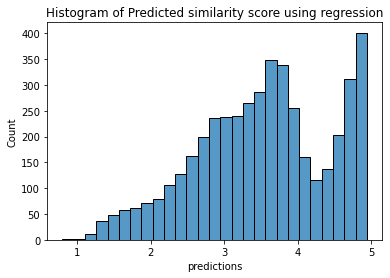

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
#
# Show a histogram of predicted values from the regression in the previous blocks.
sns.histplot(sick_data['predictions'])
plt.title('Histogram of Predicted similarity score using regression')
plt.show()

In [19]:
#
# Make lists of the sentence pairs where the predicted value from the regression
# is larger than 4.9. Save the actual texts as you will be creating more vectors
# in the code below. Print some or all of the sentence pairs as well.
#
high_list_A = []
high_list_B = []

# Add a loop here to fill those two lists, but only for rows where the 
# predicted relatedness_score is greater than 4.9.
for i in range(sick_data.shape[0]):
  if sick_data.iloc[i, sick_data.columns.get_loc('predictions')] > 4.9:
    high_list_A.append(sick_data.iloc[i, sick_data.columns.get_loc('sentence_A')])
    high_list_B.append(sick_data.iloc[i, sick_data.columns.get_loc('sentence_B')])

**Task 6: Create a list of vector representations of sentence_A from the list of most similar sentences**

Use the vector representation list to create a search function. Choose as a test sentence any sentence_B from the list of most similar sentences. Calculate a vector representation of that sentence. Then calculate a list of distance scores between the sentence_A vectors and the test sentence. Find the most similar sentence from the list.  

In [20]:
# You can use the same sentence encoder as you did above. So a call to
# model.encode(high_list_A) should produce the list you need

high_vects = model.encode(high_list_A)

In [21]:
# Pick any one sentence from high_list_B and create a vector representation of it.
# This is your test sentence.

test_sentence_vect = model.encode(high_list_B[21])

In [22]:
# Generate a list of cosine similarity scores between your test sentence and all of the
# vectors from high_vects. Then find the highest value and the corresponding
# text of sentence_A.

similarity_scores = []

for i in range(len(high_vects)):
  similarity_scores.append(cos_sim(high_vects[i], test_sentence_vect).tolist()[0][0]) 

In [23]:
max(similarity_scores) # 0.9929 is the maximum similarity score of a sentence belonging to sentence_A with the following sentence_B
print(sick_data['sentence_B'][21])

# Corresponding sentence_A:
sick_data['sentence_A'][np.argmax(similarity_scores)]

Three kids are sitting in the leaves


'Children in red shirts are playing in the leaves'

Don't forget to write a comment describing your findings. How well were you able to predict the relatedness score from the other variables? Did entailment or contradiction work as predictors and what does each coefficient say about the results? Would it be helpful to know something about entailment if we are trying to find the most accurate similarity results.  In the last step, if you had tested every sentence, rather than just one, how many correct searches would you have achieved? 

##### Comments
R2 value of the regression model was 77.3%. This means 77.3% of the variability in relatedness_score was explained by the cosine similarity score that we obtained, contradiction and neutral category of statements. All the predictors along with the intercept were statistically significant. 

Knowing about entailment would help. Even if the sentence is contradictory, relatedness score is decent as can be seen in the below example. Just adding a word 'not' has changed the entire context but the relatedness score is 3.4

In [24]:
print(sick_data.iloc[14]['sentence_A'])
print(sick_data.iloc[14]['sentence_B'])
print(sick_data.iloc[14]['relatedness_score'])

Two people are kickboxing and spectators are not watching
Two people are kickboxing and spectators are watching
3.4
